In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                             AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (TfidfVectorizer, 
                                             CountVectorizer, 
                                             HashingVectorizer)
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [2]:
# col_names = ['id', 'comments', 'subreddits']
# data = pd.read_csv('data/reddit_train.csv')
# from dataProcessing import preProcessing
# data = preProcessing("data/reddit_train.csv")
data = pd.read_pickle("ProcessedComments.pickle")
X_train, X_test, y_train, y_test = train_test_split(data['comments'],
                                                    data['subreddits'],
                                                    train_size=0.8)


In [6]:
type(np.array(y_test))

numpy.ndarray

In [7]:
tf_idf_vectorizer = TfidfVectorizer(strip_accents='ascii',
                                    ngram_range=(1,1))
#                                     max_features=1000000)
vectors_train_idf = normalize(tf_idf_vectorizer.fit_transform(X_train))
print(vectors_train_idf.shape)
vectors_test_idf = normalize(tf_idf_vectorizer.transform(X_test))

(56000, 47944)


In [9]:
from naive_bayes import BernoulliNB
nb = BernoulliNB(alpha=1)
nb.fit(vectors_train_idf, np.array(y_train))


In [11]:
nb.predict(np.array(np.array(vectors_test_idf)))

IndexError: tuple index out of range

In [24]:
estis = np.linspace(1, 200, 20).astype(int)
depths = np.linspace(1, 100, 10).astype(int)
param_space = np.zeros((len(estis), len(depths)))
for i, esti in zip(range(len(estis)), estis):
    for j, depth in zip(range(len(depths)), depths):
        rf_clf = RandomForestClassifier(n_estimators=esti,
                                        max_depth=depth)
        rf_cld = rf_clf.fit(vectors_train_idf, y_train)
        rf_y_pred = rf_clf.predict(vectors_test_idf)
        rf_acc = metrics.accuracy_score(y_test, rf_y_pred)
        param_space[i,j] = rf_acc
        print(F"depth: {depth}, estimators: {esti}"
              F"| {rf_acc}")
# print(metrics.classification_report(y_test, rf_y_pred))

depth: 1, estimators: 1| 0.048928571428571425
depth: 12, estimators: 1| 0.08
depth: 23, estimators: 1| 0.09678571428571428
depth: 34, estimators: 1| 0.10521428571428572
depth: 45, estimators: 1| 0.13485714285714287
depth: 56, estimators: 1| 0.13542857142857143
depth: 67, estimators: 1| 0.13135714285714287
depth: 78, estimators: 1| 0.14157142857142857
depth: 89, estimators: 1| 0.15257142857142858
depth: 100, estimators: 1| 0.14714285714285713
depth: 1, estimators: 11| 0.062142857142857146
depth: 12, estimators: 11| 0.21842857142857142
depth: 23, estimators: 11| 0.2577857142857143
depth: 34, estimators: 11| 0.2922142857142857
depth: 45, estimators: 11| 0.3042142857142857
depth: 56, estimators: 11| 0.31657142857142856
depth: 67, estimators: 11| 0.32557142857142857
depth: 78, estimators: 11| 0.3284285714285714
depth: 89, estimators: 11| 0.3255
depth: 100, estimators: 11| 0.341
depth: 1, estimators: 21| 0.08871428571428572
depth: 12, estimators: 21| 0.24457142857142858
depth: 23, estimators

depth: 12, estimators: 189| 0.3906428571428571
depth: 23, estimators: 189| 0.42128571428571426
depth: 34, estimators: 189| 0.42814285714285716
depth: 45, estimators: 189| 0.43735714285714283
depth: 56, estimators: 189| 0.43935714285714284
depth: 67, estimators: 189| 0.4457857142857143
depth: 78, estimators: 189| 0.44821428571428573
depth: 89, estimators: 189| 0.4482857142857143
depth: 100, estimators: 189| 0.45
depth: 1, estimators: 200| 0.20364285714285715
depth: 12, estimators: 200| 0.39585714285714285
depth: 23, estimators: 200| 0.42114285714285715
depth: 34, estimators: 200| 0.4313571428571429
depth: 45, estimators: 200| 0.43442857142857144
depth: 56, estimators: 200| 0.44292857142857145
depth: 67, estimators: 200| 0.4422857142857143
depth: 78, estimators: 200| 0.44507142857142856
depth: 89, estimators: 200| 0.4495
depth: 100, estimators: 200| 0.44985714285714284


a:0.04254362300016268, b:93.83587588702066, c:-78.11006552504483
a:0.033652113563491876, b:2583.5855549184666, c:-2518.4308652292657


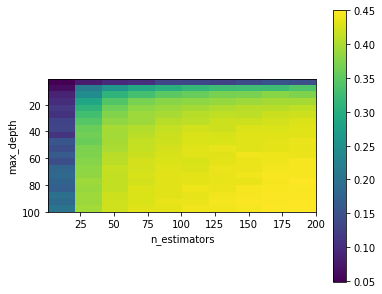

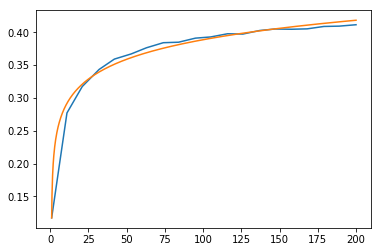

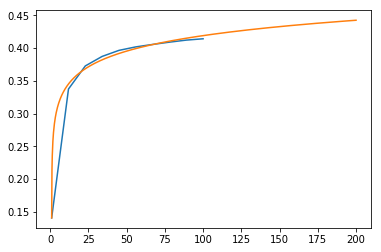

In [13]:
# np.save('rfdt_param_space', [param_space, estis, depths])
[param_space, estis, depths] = np.load('rfdt_param_space.npy', 
                                       allow_pickle=True)
plt.figure(figsize=(6,5))
plt.imshow(param_space, extent=(estis[0], estis[-1],
                                depths[-1], depths[0]))
plt.colorbar()
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

plt.figure()
plt.plot(estis, np.mean(param_space, axis=1))
func = lambda x, a, b, c: a * np.log(b * x + c)
popt, pcov = curve_fit(func, estis, np.mean(param_space, axis=1))
print(F"a:{popt[0]}, b:{popt[1]}, c:{popt[2]}")
space = np.linspace(1, 200, 1000)
plt.plot(space, func(space, *popt))


plt.figure()
plt.plot(depths, np.mean(param_space, axis=0))
popt, pcov = curve_fit(func, depths, np.mean(param_space, axis=0))
print(F"a:{popt[0]}, b:{popt[1]}, c:{popt[2]}")
plt.plot(space, func(space, *popt))
# plt.plot(depths, param_space[-1,:])

plt.show()

In [4]:
dt_clf = DecisionTreeClassifier(criterion="gini")
dt_cld = dt_clf.fit(vectors_train_idf, y_train)
dt_y_pred = dt_clf.predict(vectors_test_idf)
print(F"depth = {dt_cld.get_depth()}")
print(metrics.classification_report(y_test, dt_y_pred))
kf_scores = cross_val_score(dt_clf, vectors_train_idf, y_train, cv=5)


depth = 795
                 precision    recall  f1-score   support

      AskReddit       0.12      0.13      0.12       694
GlobalOffensive       0.24      0.27      0.25       680
          Music       0.43      0.43      0.43       668
      Overwatch       0.39      0.34      0.36       731
          anime       0.34      0.31      0.32       672
       baseball       0.24      0.24      0.24       705
         canada       0.25      0.26      0.25       721
     conspiracy       0.19      0.17      0.18       750
         europe       0.23      0.24      0.23       703
          funny       0.09      0.10      0.10       708
  gameofthrones       0.47      0.47      0.47       704
         hockey       0.21      0.23      0.22       679
leagueoflegends       0.23      0.22      0.23       651
         movies       0.32      0.34      0.33       706
            nba       0.27      0.27      0.27       683
            nfl       0.22      0.21      0.21       723
         soccer   

In [5]:
# plt.figure(figsize=(15,15), dpi=1000)
# plot_tree(cld, feature_names=tf_idf_vectorizer.get_feature_names(),
#                class_names=data['subreddits'],
#                fontsize=5)
# plt.savefig('reddit_tree.png')
# plt.show()
# plt.savefig('reddit_tree.png')

In [195]:
rf_clf = RandomForestClassifier(n_estimators=400,
                                max_depth=30)
rf_cld = rf_clf.fit(vectors_train_idf, y_train)
rf_y_pred = rf_clf.predict(vectors_test_idf)
print(metrics.classification_report(y_test, rf_y_pred))
# print(np.mean(cross_val_score(rf_clf, vectors_train_idf, y_train, cv=5)))


                 precision    recall  f1-score   support

      AskReddit       0.18      0.23      0.20       647
GlobalOffensive       0.69      0.43      0.53       723
          Music       0.76      0.59      0.67       746
      Overwatch       0.78      0.56      0.65       781
          anime       0.50      0.55      0.52       693
       baseball       0.66      0.47      0.55       698
         canada       0.54      0.39      0.45       734
     conspiracy       0.38      0.36      0.37       680
         europe       0.43      0.43      0.43       687
          funny       0.11      0.42      0.17       689
  gameofthrones       0.78      0.65      0.71       702
         hockey       0.58      0.43      0.50       702
leagueoflegends       0.51      0.53      0.52       675
         movies       0.61      0.49      0.54       712
            nba       0.62      0.50      0.55       685
            nfl       0.54      0.49      0.51       692
         soccer       0.54    

In [196]:
et_clf = ExtraTreesClassifier(n_estimators=500,
                              max_depth=20)
et_cld = et_clf.fit(vectors_train_idf, y_train)
et_y_pred = et_clf.predict(vectors_test_idf)
print(metrics.classification_report(y_test, et_y_pred))
# fold = 3
# print(F"{fold} fold mean acc: "
#       F"{np.mean(cross_val_score(ab_dt_clf, vectors_train_idf, y_train, cv=fold))}")

                 precision    recall  f1-score   support

      AskReddit       0.10      0.62      0.17       647
GlobalOffensive       0.77      0.41      0.53       723
          Music       0.84      0.48      0.61       746
      Overwatch       0.85      0.48      0.61       781
          anime       0.57      0.55      0.56       693
       baseball       0.69      0.48      0.56       698
         canada       0.63      0.33      0.43       734
     conspiracy       0.36      0.35      0.35       680
         europe       0.43      0.37      0.40       687
          funny       0.18      0.03      0.05       689
  gameofthrones       0.84      0.64      0.72       702
         hockey       0.69      0.45      0.55       702
leagueoflegends       0.55      0.55      0.55       675
         movies       0.64      0.50      0.56       712
            nba       0.63      0.53      0.58       685
            nfl       0.54      0.50      0.52       692
         soccer       0.45    

In [198]:
ab_dt_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                               n_estimators=100,
                               learning_rate=1)
ab_dt_cld = ab_dt_clf.fit(vectors_train_idf, y_train)
ab_dt_y_pred = ab_dt_clf.predict(vectors_test_idf)
print(metrics.classification_report(y_test, ab_dt_y_pred))
# fold = 3
# print(F"{fold} fold mean acc: "
#       F"{np.mean(cross_val_score(ab_dt_clf, vectors_train_idf, y_train, cv=fold))}")


                 precision    recall  f1-score   support

      AskReddit       0.12      0.24      0.16       647
GlobalOffensive       0.45      0.37      0.41       723
          Music       0.69      0.51      0.59       746
      Overwatch       0.64      0.45      0.53       781
          anime       0.47      0.41      0.44       693
       baseball       0.50      0.40      0.45       698
         canada       0.44      0.27      0.34       734
     conspiracy       0.26      0.25      0.25       680
         europe       0.42      0.24      0.31       687
          funny       0.10      0.36      0.16       689
  gameofthrones       0.62      0.57      0.60       702
         hockey       0.37      0.32      0.35       702
leagueoflegends       0.48      0.39      0.43       675
         movies       0.48      0.37      0.41       712
            nba       0.45      0.40      0.42       685
            nfl       0.43      0.38      0.40       692
         soccer       0.46    

In [ ]:
ab_et_clf = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=5,
                                                    max_depth=20), 
                               n_estimators=100)
ab_et_cld = ab_et_clf.fit(vectors_train_idf, y_train)
ab_et_y_pred = ab_et_clf.predict(vectors_test_idf)
print(metrics.classification_report(y_test, ab_et_y_pred))
fold = 3
print(F"{fold} fold mean acc: {np.mean(cross_val_score(ab_et_clf, vectors_train_idf, y_train, cv=fold))}")


In [141]:
count_vectorizer = CountVectorizer(strip_accents='ascii',
                                    stop_words='english',
                                    ngram_range=(1,1))
vectors_train_count = normalize(count_vectorizer.fit_transform(X_train))
print(vectors_train_count.shape)
# print(tf_idf_vectorizer.stop_words_)
vectors_test_count = normalize(count_vectorizer.transform(X_test))

(56000, 65728)


In [197]:
ab_nb_clf = AdaBoostClassifier(MultinomialNB(alpha=0.001),
                               n_estimators=60)
ab_nb_cld = ab_nb_clf.fit(vectors_train_idf, y_train)
ab_nb_y_pred = ab_nb_clf.predict(vectors_test_idf)
print(metrics.classification_report(y_test, ab_nb_y_pred))
# fold = 3
# print(F"{fold} fold mean acc: "
#       F"{np.mean(cross_val_score(ab_nb_clf, vectors_train_idf, y_train, cv=fold))}")


                 precision    recall  f1-score   support

      AskReddit       0.18      0.42      0.25       647
GlobalOffensive       0.61      0.51      0.55       723
          Music       0.78      0.57      0.66       746
      Overwatch       0.79      0.49      0.61       781
          anime       0.55      0.54      0.54       693
       baseball       0.67      0.49      0.57       698
         canada       0.49      0.41      0.45       734
     conspiracy       0.34      0.46      0.39       680
         europe       0.44      0.39      0.41       687
          funny       0.15      0.33      0.21       689
  gameofthrones       0.79      0.60      0.68       702
         hockey       0.58      0.47      0.52       702
leagueoflegends       0.60      0.50      0.55       675
         movies       0.61      0.50      0.55       712
            nba       0.64      0.50      0.56       685
            nfl       0.54      0.52      0.53       692
         soccer       0.55    